In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('Train_Data.csv')
test_data=pd.read_csv('Test_Data.csv')

In [3]:
train_data

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='sex', ylabel='count'>

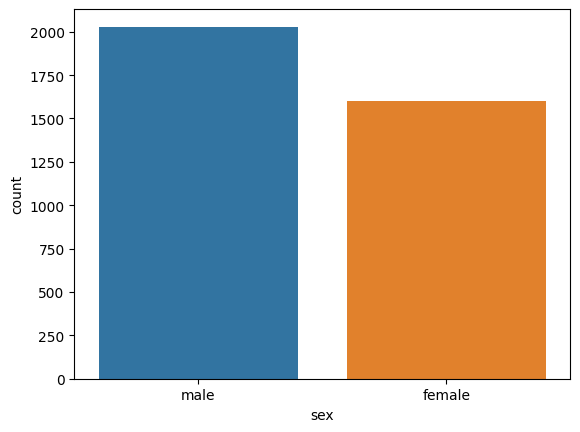

In [5]:
sns.countplot(x='sex',data=train_data)

<AxesSubplot:xlabel='smoker', ylabel='count'>

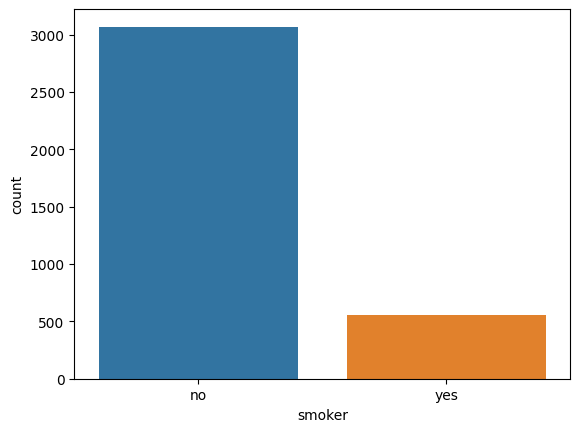

In [6]:
sns.countplot(x="smoker", data=train_data)

In [7]:
x=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]

<AxesSubplot:xlabel='smoker', ylabel='count'>

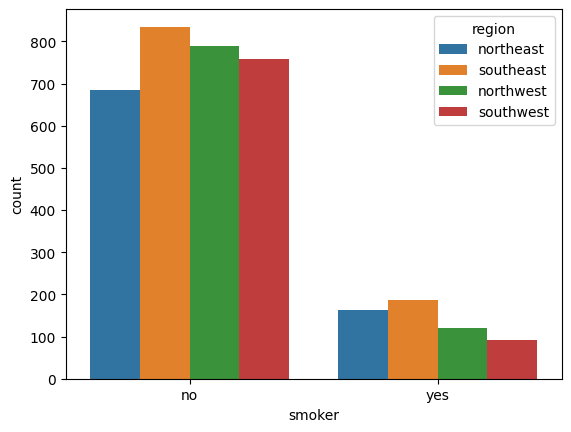

In [8]:
sns.countplot(x="smoker", hue="region", data=train_data)

<AxesSubplot:xlabel='sex', ylabel='count'>

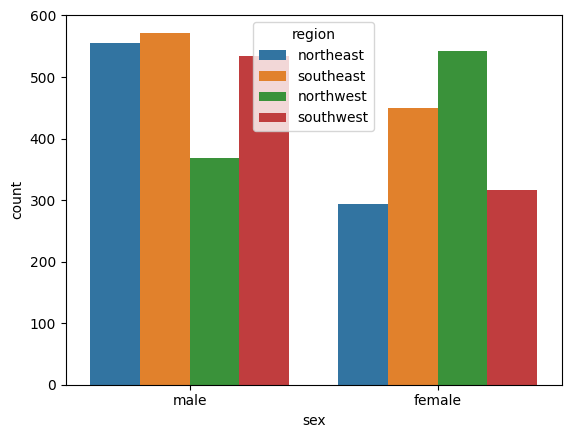

In [9]:
sns.countplot(x="sex", hue="region", data=train_data)

In [10]:
x

,age,sex,bmi,smoker,region,children
0,21.000000,male,25.745000,no,northeast,2
1,36.976978,female,25.744165,yes,southeast,3
2,18.000000,male,30.030000,no,southeast,1
3,37.000000,male,30.676891,no,northeast,3
4,58.000000,male,32.010000,no,southeast,1
...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4
3626,38.661977,female,26.202557,no,southeast,2
3627,56.000000,male,40.300000,no,southwest,0
3628,48.061207,female,34.930624,no,southeast,1


In [11]:
y


0        3279.868550
1       21454.494239
2        1720.353700
3        6801.437542
4       11946.625900
            ...     
3625    10987.324964
3626    11735.844352
3627    10602.385000
3628     8976.140452
3629     7027.698968
Name: charges, Length: 3630, dtype: float64

In [12]:
col=train_data.select_dtypes(include=object).columns
pd.DataFrame(col,columns=['String'])

,String
0,sex
1,smoker
2,region


In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for c in col :
    x[c]=le.fit_transform(x[c])
    test_data[c]=le.fit_transform(test_data[c])
    

In [15]:
x


,age,sex,bmi,smoker,region,children
0,21.000000,1,25.745000,0,0,2
1,36.976978,0,25.744165,1,2,3
2,18.000000,1,30.030000,0,2,1
3,37.000000,1,30.676891,0,0,3
4,58.000000,1,32.010000,0,2,1
...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,1,4
3626,38.661977,0,26.202557,0,2,2
3627,56.000000,1,40.300000,0,3,0
3628,48.061207,0,34.930624,0,2,1


In [16]:
test_data

,age,sex,bmi,smoker,region,children
0,40.000000,1,29.900000,0,3,2
1,47.000000,1,32.300000,0,3,1
2,54.000000,0,28.880000,0,0,2
3,37.000000,1,30.568094,0,0,3
4,59.130049,1,33.132854,1,0,4
...,...,...,...,...,...,...
487,51.000000,1,27.740000,0,0,1
488,33.000000,1,42.400000,0,3,5
489,47.769999,1,29.064615,0,0,4
490,41.530738,0,24.260852,0,2,5


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,max_depth=20, random_state=33)
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=33)

In [25]:
print('Random Forest Regressor Train Score is : ' , regressor.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , regressor.score(x_test, y_test))

Random Forest Regressor Train Score is :  0.9857184158810396
Random Forest Regressor Test Score is :  0.8889789152422148


In [26]:
y_pred = regressor.predict(x_test)

pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted'])

,Actual,Predicted
0,11048.964113,11306.050908
1,10658.505363,10770.738049
2,27808.725100,29186.810176
3,2104.113400,2154.680772
4,12649.604080,12724.881170
...,...,...
903,27302.628464,27502.370819
904,12129.614150,12369.178550
905,16796.411940,11667.496074
906,5347.093906,7193.673738
